In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('Netflix_Userbase.csv')
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
data.duplicated().sum()

np.int64(0)

In [4]:
data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

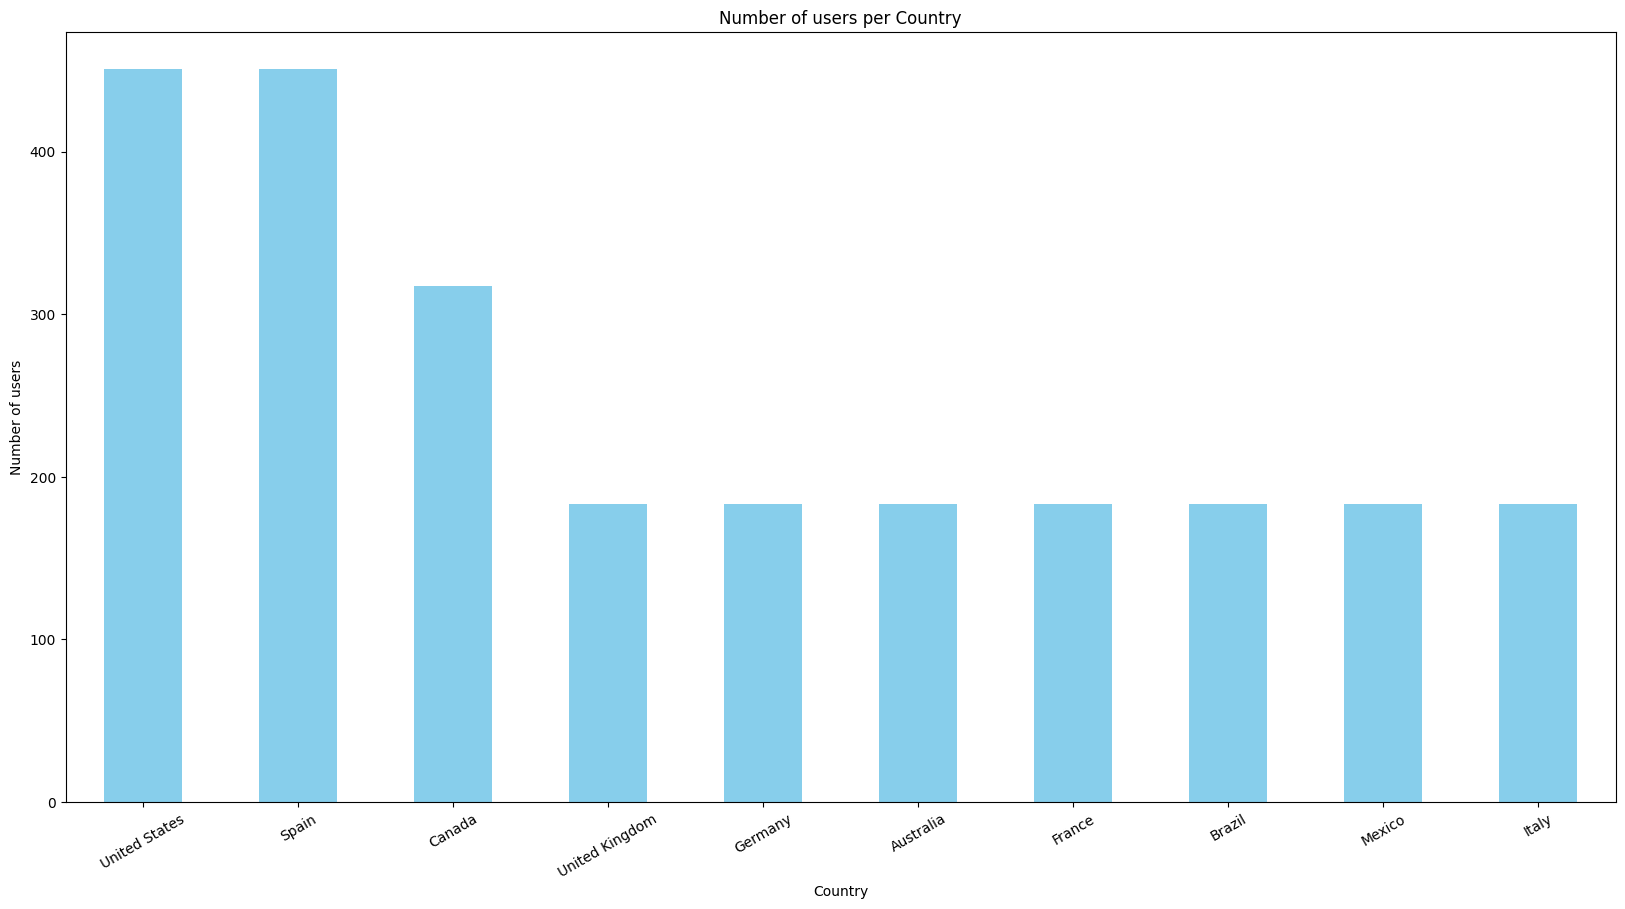

In [5]:
plt.figure(figsize=(20, 10))
data['Country'].value_counts().plot(kind='bar', color = 'skyblue')
plt.title('Number of users per Country')
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.xticks(rotation = 30)
plt.show()

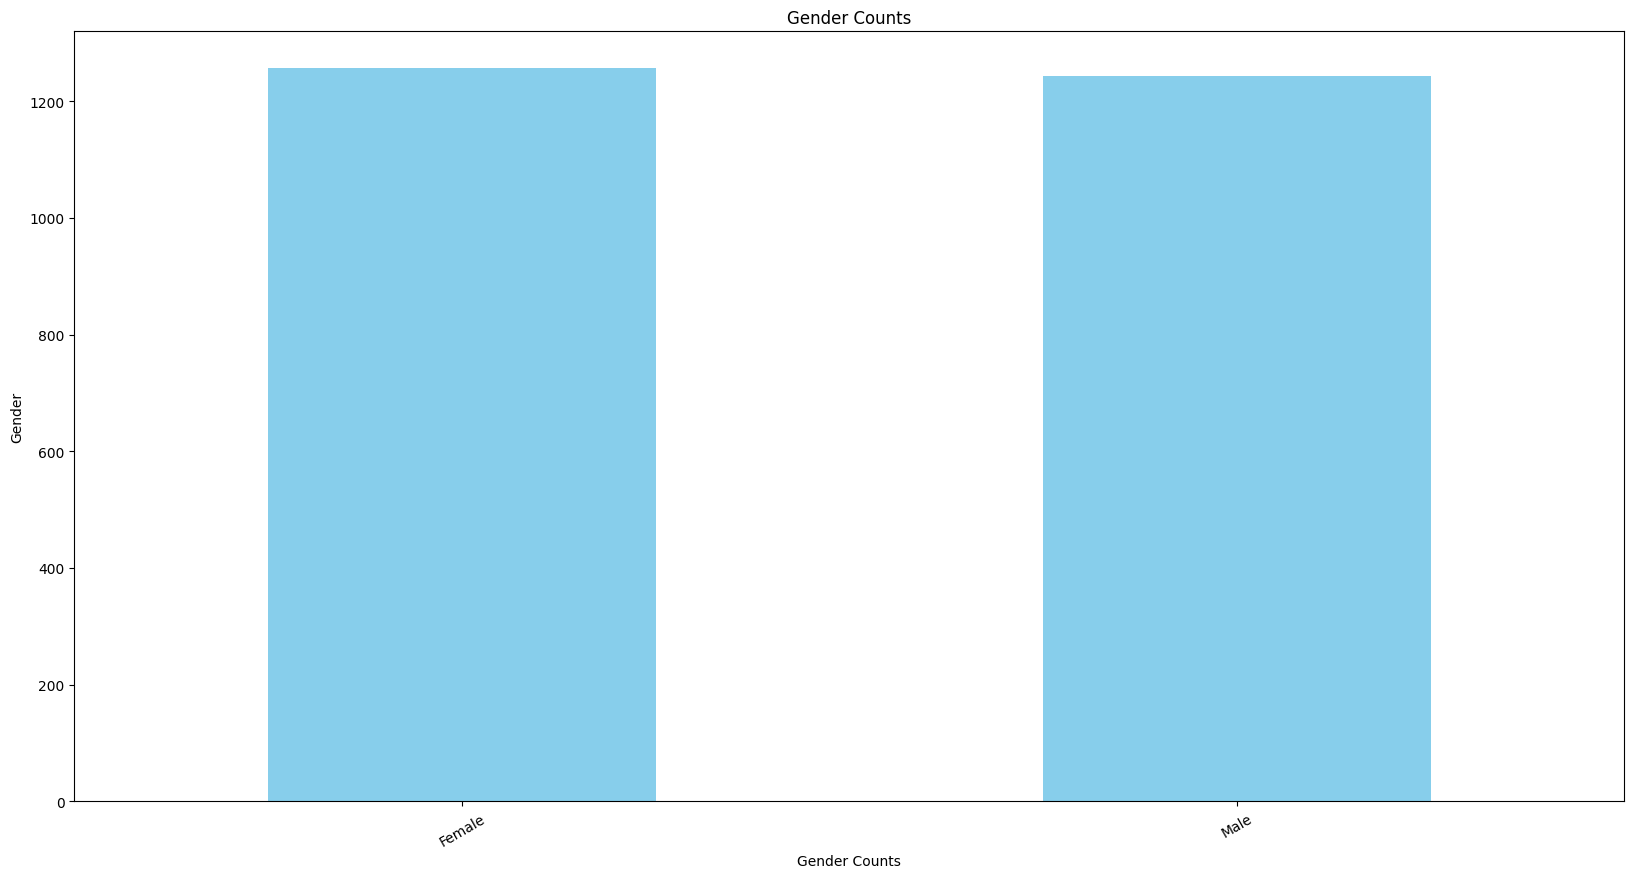

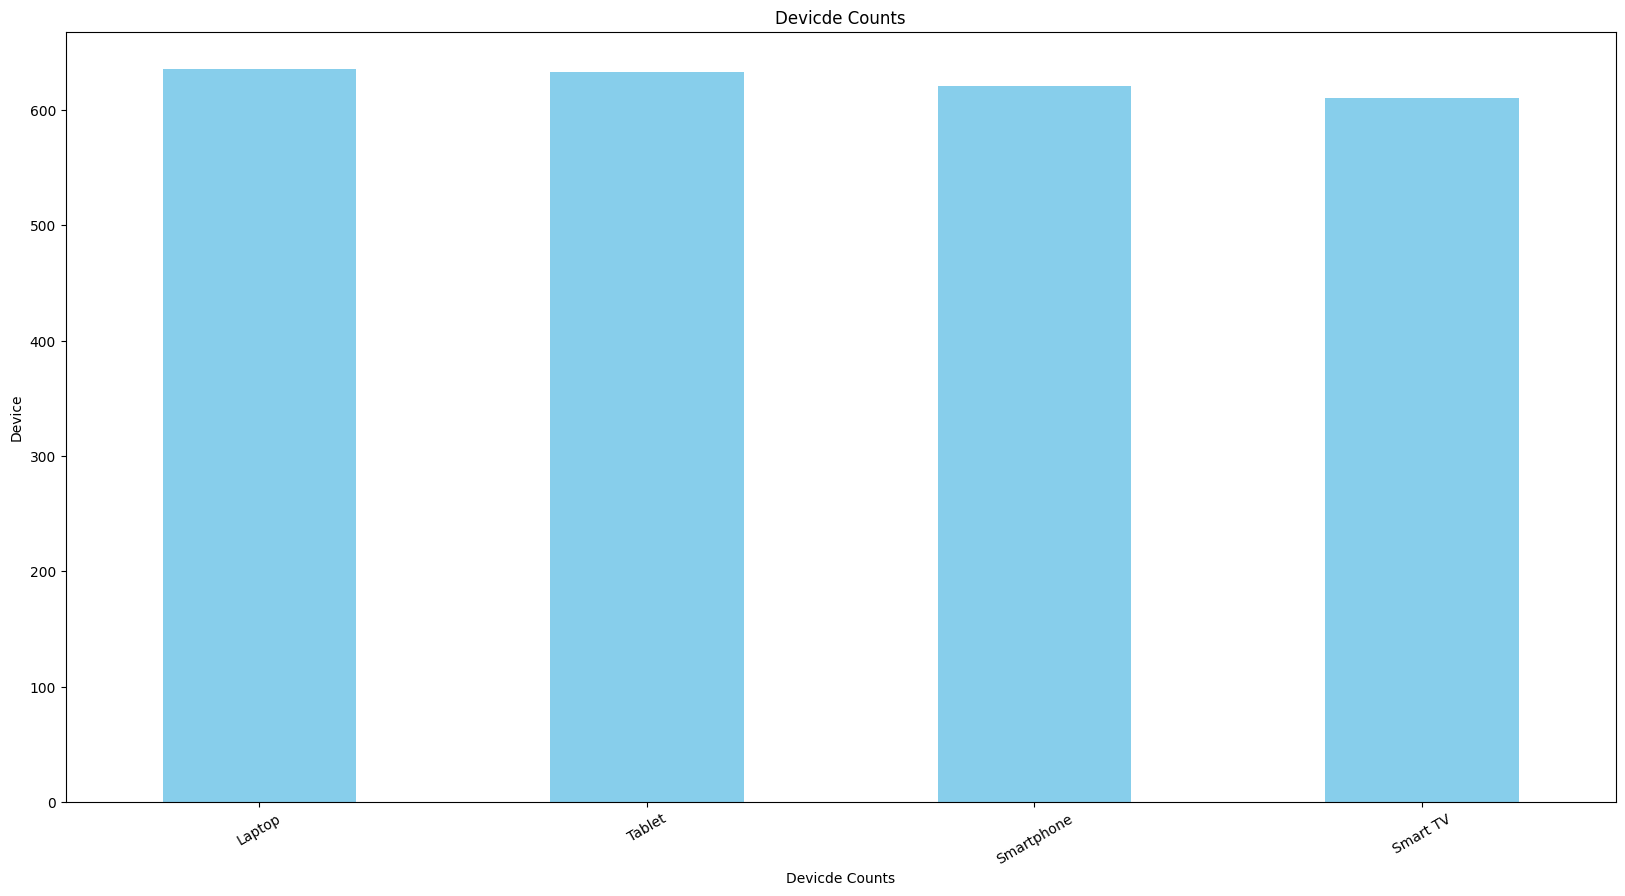

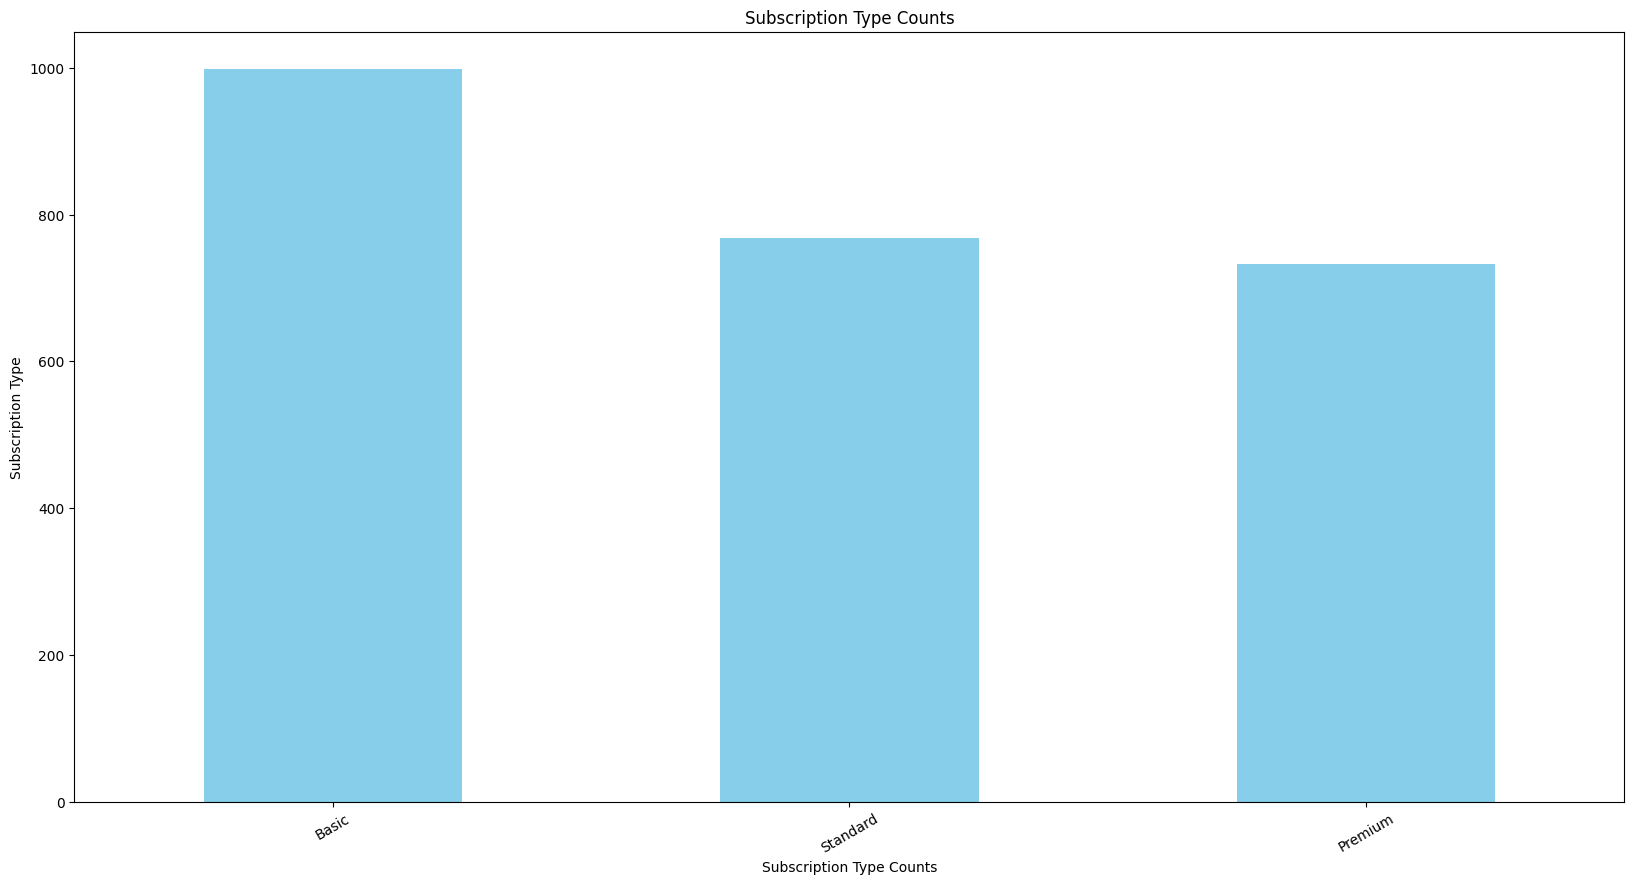

In [6]:
Columns_titles = {


    'Gender' : 'Gender Counts',
    'Device' : 'Devicde Counts',
    'Subscription Type' : 'Subscription Type Counts'
}

for column, title in Columns_titles.items():
    plt.figure(figsize=(20, 10))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel(column)
    plt.xticks(rotation = 30)
    plt.show()

In [7]:
user_counts_by_country = data['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Count']

import plotly.express as px



In [8]:
fig = px.choropleth(user_counts_by_country, locations = 'Country', locationmode = 'country names', color = 'User Count', 
hover_name = 'Country', title='User Distribution By Country',
color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    width = 1000,
    height = 700,
    title_font_size = 24,
    geo=dict(
        showframe = False,
        showcoastlines = True,
    )
)

fig.show()

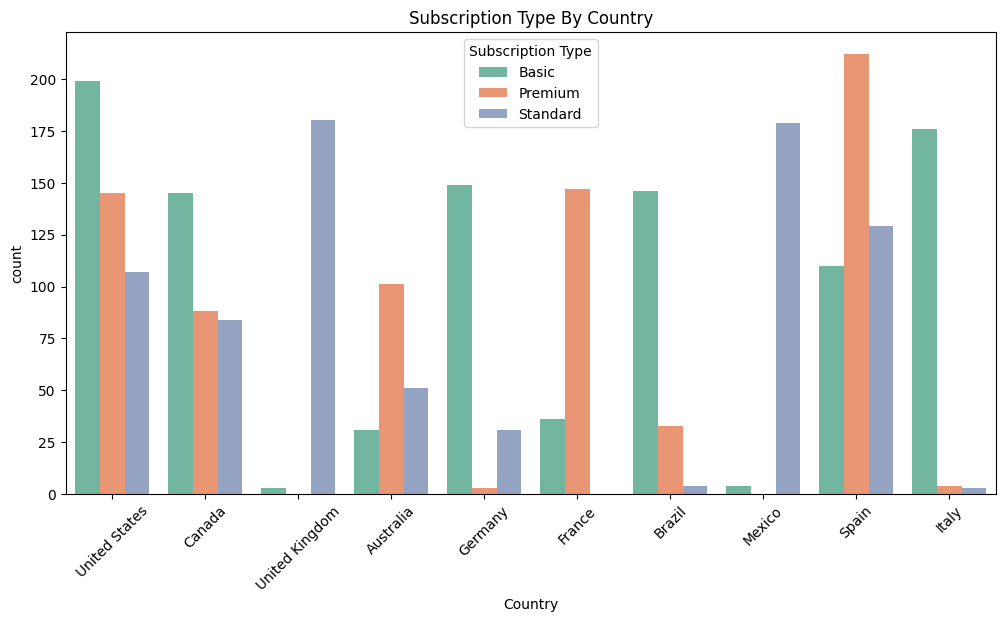

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue = 'Subscription Type', data = data, palette = 'Set2')
plt.title('Subscription Type By Country')
plt.xticks(rotation = 45)
plt.show()


In [10]:
subs_by_country = data.pivot_table(index='Country', columns='Subscription Type', values= 'User ID', aggfunc='count', fill_value=0)
subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [11]:
subs_by_country['Total'] = subs_by_country.sum(axis=1)
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


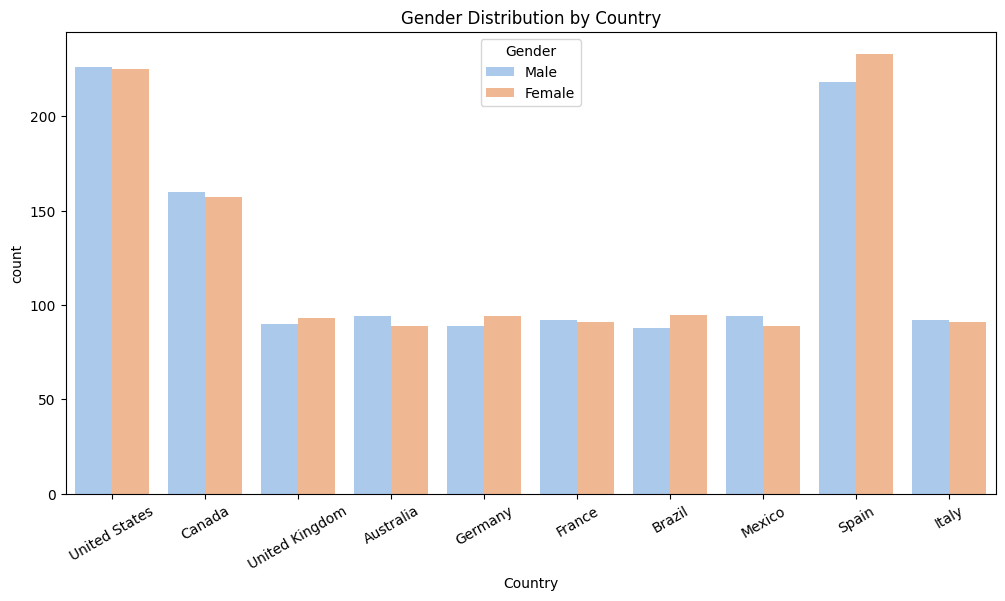

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Gender', data=data, palette='pastel')
plt.title('Gender Distribution by Country')
plt.xticks(rotation = 30)
plt.show()

In [13]:
gender_by_country = data.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)
gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [14]:
subs_by_country_gender = data.pivot_table(index='Country', 
columns=['Subscription Type', 'Gender'], 
values= 'User ID', aggfunc='count',
fill_value=0)

subs_by_country_gender

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

In [15]:
subs_by_country_gender2 = data.pivot_table(index=['Country', 'Gender'], columns = 'Subscription Type', values = 'User ID', aggfunc='count', fill_value=0)
subs_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

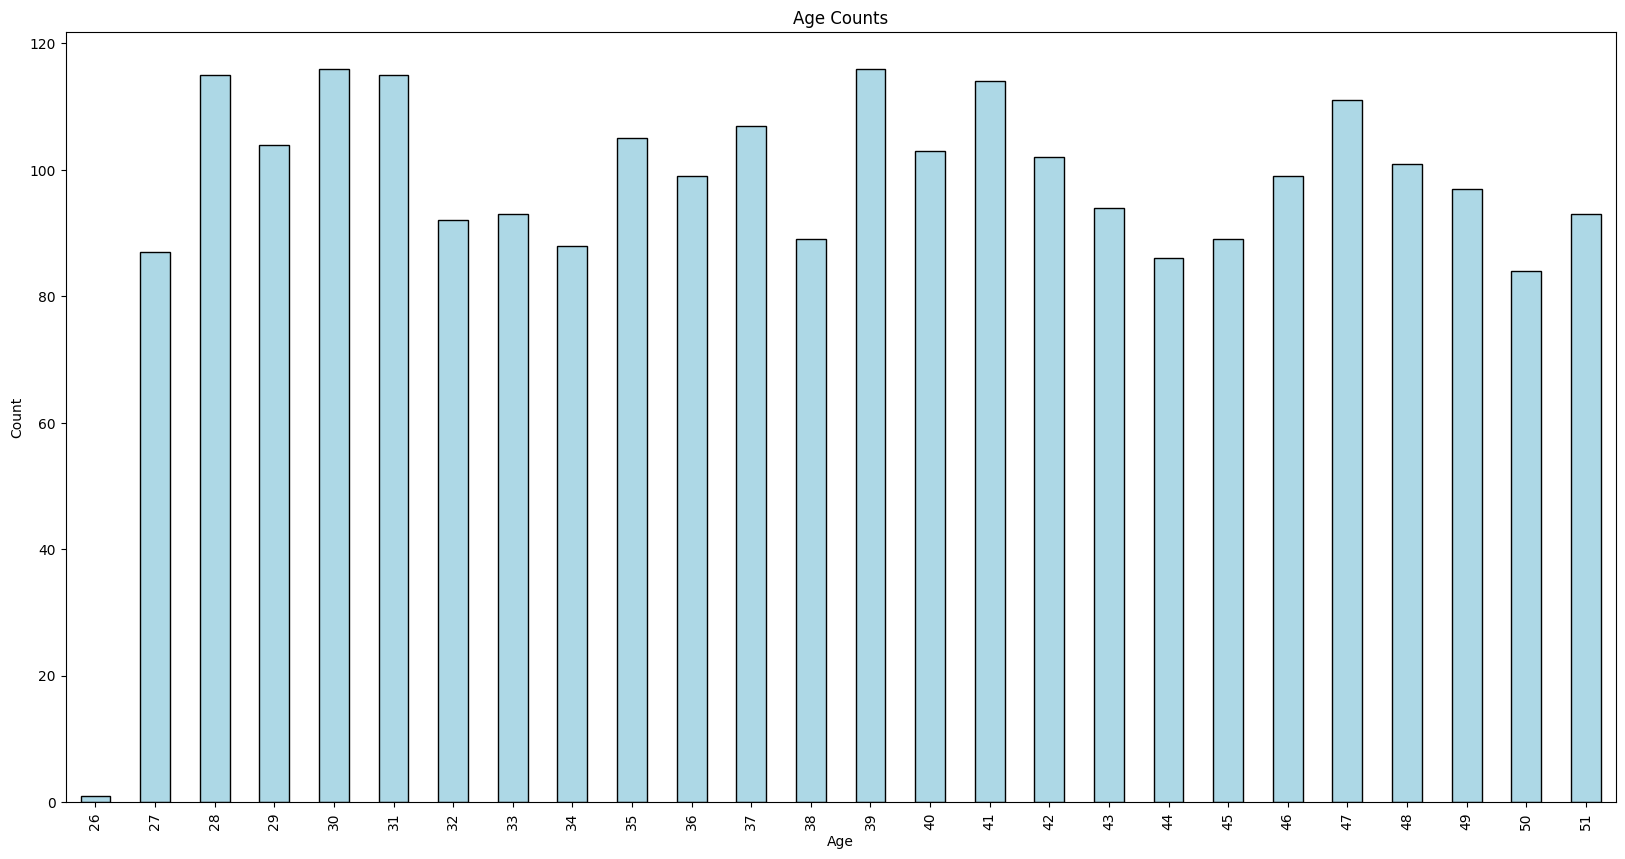

In [16]:
plt.figure(figsize=(20, 10))
data['Age'].value_counts().sort_index().plot(kind = 'bar', color = 'lightblue', edgecolor = 'Black')
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [17]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [18]:
data['Join Date'] = pd.to_datetime(data['Join Date'], format = '%d-%m-%y')
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], format = '%d-%m-%y')

data['Duration'] = (data['Last Payment Date'] - data['Join Date']).dt.days
data['Duration Months'] = data['Duration'].apply(lambda x: math.ceil(x / 30))

In [19]:
avg_duration = data['Duration Months'].mean()

In [20]:
print("Average Duration" ,avg_duration)

Average Duration 10.7808


In [21]:
data['LTV'] = data['Monthly Revenue'] * data['Duration Months']

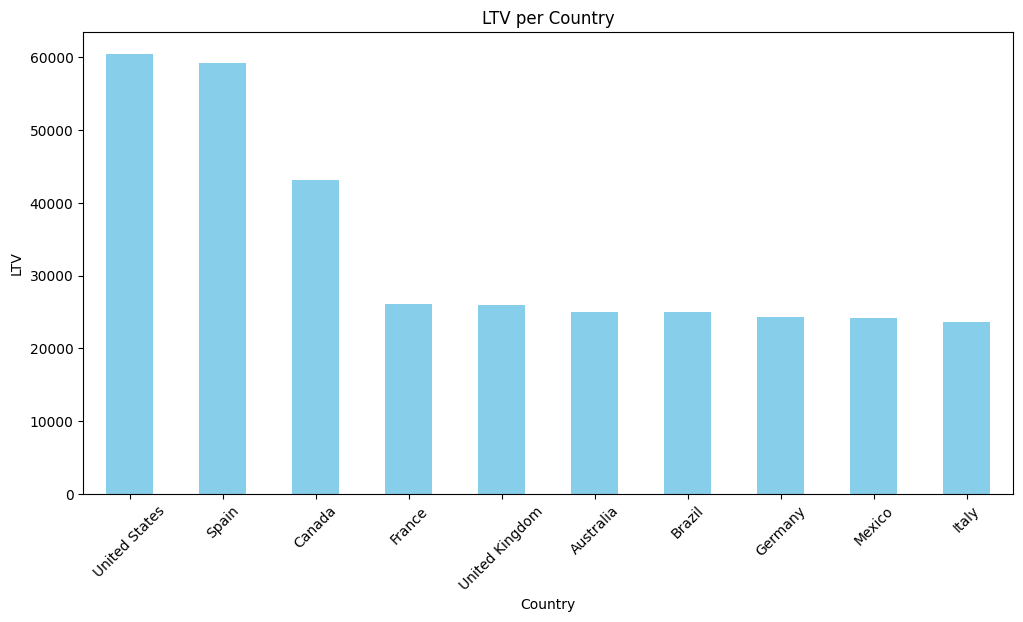

In [22]:
ltv_per_country_sum = data.groupby('Country')['LTV'].sum().sort_values(ascending = False)

plt.figure(figsize= (12, 6))
ltv_per_country_sum.plot(kind = 'bar', color = 'skyblue')
plt.title('LTV per Country')
plt.xlabel('Country')
plt.ylabel('LTV')
plt.xticks(rotation = 45)
plt.show()

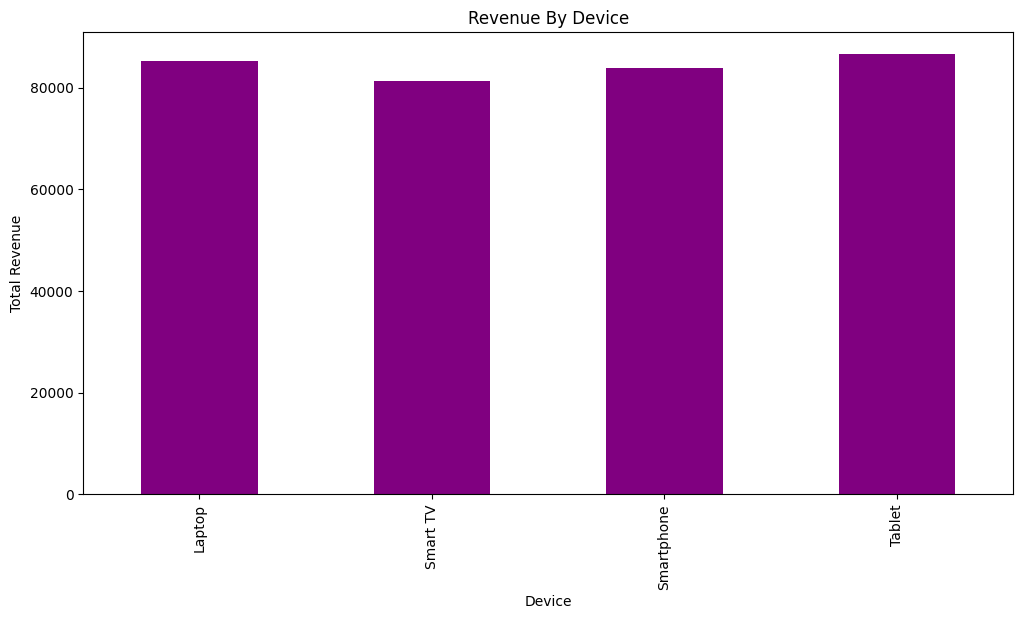

In [23]:
revenue_by_device = data.groupby('Device')['LTV'].sum()

plt.figure(figsize=(12,6))
revenue_by_device.plot(kind= 'bar', color='purple')
plt.title('Revenue By Device')
plt.xlabel('Device')
plt.ylabel('Total Revenue')
plt.show()

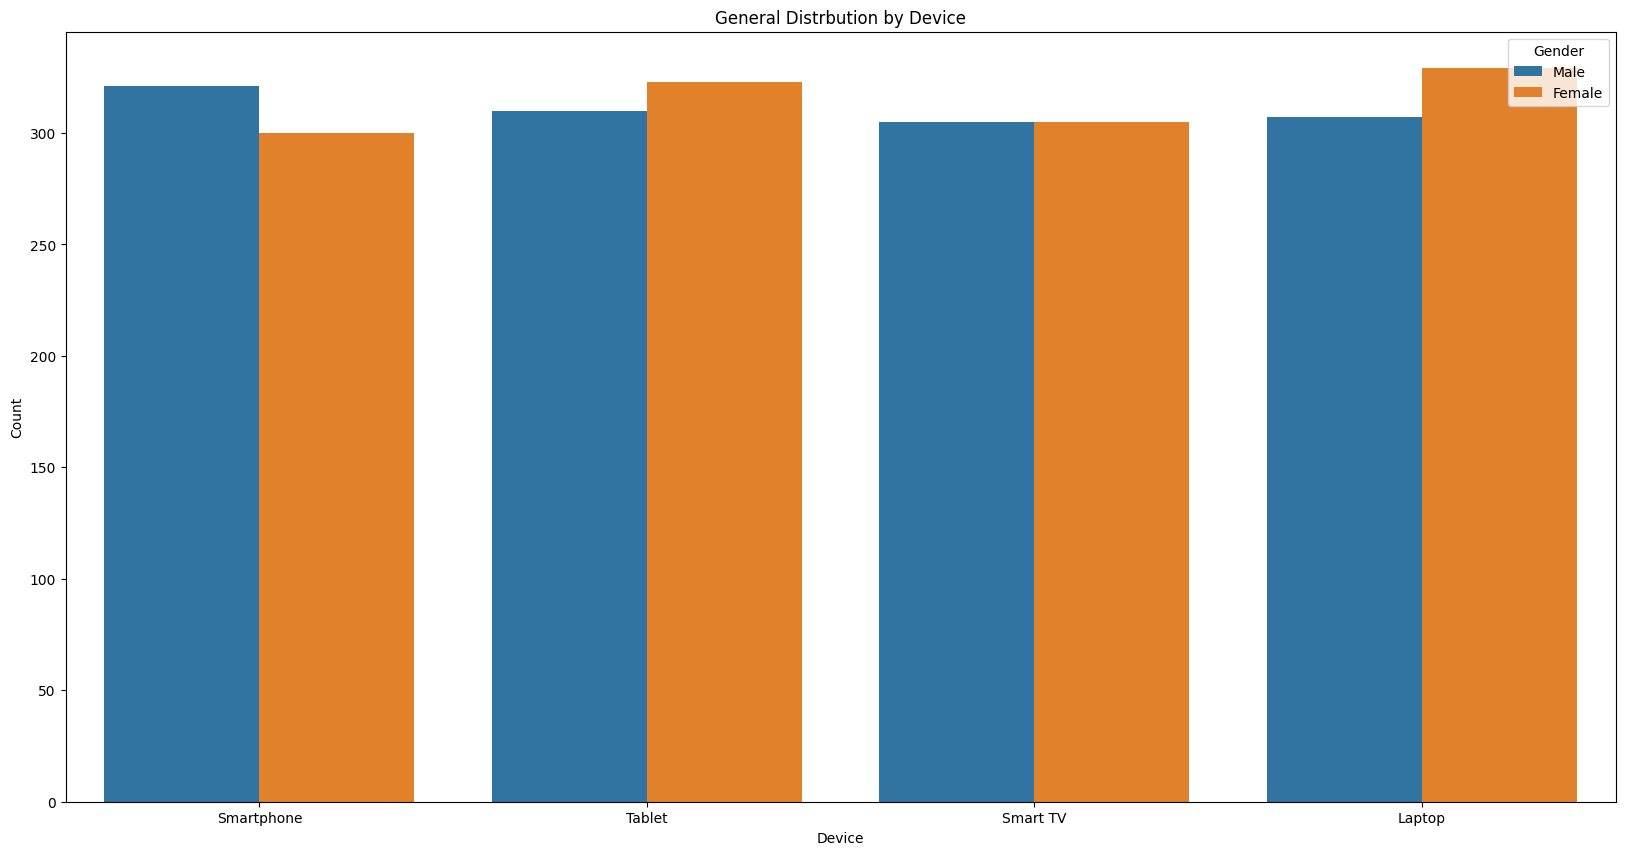

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Device', hue='Gender', data = data)
plt.title('General Distrbution by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()